## File to Create Final Output Plots for quantitative and qualitative analyis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

os.chdir("..")
print(os.getcwd())

/Users/luca/Library/CloudStorage/OneDrive-Personal/Dokumente/17_EPFL/Visual Intelligence/Project/dit-editor


In [2]:
# load scores
scores = pd.read_csv('scores.csv')
scores

,image_index,model_type,category,hpsv2_score,aesthetics_score,background_mse,clip_text_image,dinov2_similarity
0,0,Photoshop,Real-Sketch,0.381118,5.469848,0.000620,0.345759,0.064891
1,0,TF-ICON,Real-Sketch,0.426673,5.660169,0.008525,0.322444,0.058594
2,1,Photoshop,Real-Sketch,0.379129,5.508402,0.003419,0.310391,0.179352
3,1,TF-ICON,Real-Sketch,0.396661,5.580972,0.011822,0.303254,0.103354
4,2,Photoshop,Real-Sketch,0.323486,5.447720,0.000398,0.224001,0.263948
...,...,...,...,...,...,...,...,...
639,327,TF-ICON,Real-Painting,0.387360,5.930402,0.009808,0.335235,0.350105
640,328,Photoshop,Real-Painting,0.351374,5.386238,0.001085,0.308242,0.201254
641,328,TF-ICON,Real-Painting,0.321613,5.746071,0.010256,0.294885,0.140428
642,329,Photoshop,Real-Painting,0.262384,5.640841,0.000767,0.281353,0.372682


In [3]:
scores_flat = pd.melt(scores, id_vars=['model_type', 'image_index', "category"], 
                      var_name='metric', 
                      value_name='value')
scores_flat

,model_type,image_index,category,metric,value
0,Photoshop,0,Real-Sketch,hpsv2_score,0.381118
1,TF-ICON,0,Real-Sketch,hpsv2_score,0.426673
2,Photoshop,1,Real-Sketch,hpsv2_score,0.379129
3,TF-ICON,1,Real-Sketch,hpsv2_score,0.396661
4,Photoshop,2,Real-Sketch,hpsv2_score,0.323486
...,...,...,...,...,...
3215,TF-ICON,327,Real-Painting,dinov2_similarity,0.350105
3216,Photoshop,328,Real-Painting,dinov2_similarity,0.201254
3217,TF-ICON,328,Real-Painting,dinov2_similarity,0.140428
3218,Photoshop,329,Real-Painting,dinov2_similarity,0.372682


## Latex / Plotting Formatting

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4

import matplotlib.font_manager as fm
print(sorted(fm.get_font_names()))
import matplotlib.pyplot as plt
import json
# Use LaTeX font for publication
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm10"],
    "font.size": 12,
})
plt.rc('text.latex', preamble=r'\usepackage{amsmath,bm}')
percent_formatter = plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x))

import matplotlib.pyplot as plt

# # Global settings for LaTeX-like fonts
plt.rcParams['text.usetex'] = True  # Disable full LaTeX rendering to avoid dependency issues
plt.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern (LaTeX-like) fonts
plt.rcParams['font.family'] = 'serif'  # Set overall font to serif (LaTeX-style)
# Set the color for axes edges (spines)
plt.rcParams['axes.edgecolor'] = 'darkgray'
# Enable the grid for the y-axis only
plt.rcParams['axes.grid'] = False  # Enable grid
plt.rcParams['grid.linestyle'] = '--'  # Optional: Set grid line style
plt.rcParams['grid.color'] = 'lightgray'  # Optional: Set grid line color
# # Disable LaTeX rendering to avoid dependency issues
# # plt.rcParams['text.usetex'] = False
# # Use 'DejaVu Serif' or another font that's available on your system
# # plt.rcParams['font.family'] = 'serif'
# # plt.rcParams['font.family'] = 'cmr10'
# # plt.rcParams['font.family'] = 'cmss10'
# # plt.rcParams['formatter.use_mathtext'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

['.Aqua Kana', '.Keyboard', '.New York', '.SF Arabic', '.SF Arabic Rounded', '.SF Armenian', '.SF Armenian Rounded', '.SF Camera', '.SF Compact', '.SF Compact Rounded', '.SF Georgian', '.SF Georgian Rounded', '.SF Hebrew', '.SF Hebrew Rounded', '.SF NS Mono', '.SF NS Rounded', '.SF Soft Numeric', '.ThonburiUI', 'Academy Engraved LET', 'Adelle Sans Devanagari', 'AkayaKanadaka', 'AkayaTelivigala', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'American Typewriter', 'Andale Mono', 'Annai MN', 'Apple Braille', 'Apple Chancery', 'Apple LiGothic', 'Apple LiSung', 'Apple SD Gothic Neo', 'Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Arima Koshi', 'Arima Madurai', 'Athelas', 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 'Ayuthaya', 'BM Dohyeon', 'BM Hanna 11yrs Old', 'BM Hanna Air', 'BM Hanna Pro', 'BM Jua', 'BM Kirang Haerang', 'BM Yeonsung', 'Baghdad', 'Bai Jamjuree', 'Baloo 2', 'Baloo Bhai 2', '

# Aggregated analyis
Metrics aggregated over all image / task categories

Print out Mean + std table

In [5]:
from scipy import stats

# create mean and std table for metrics across model_types with statistical significance
def create_mean_std_table(scores_flat, group_by=['metric', "model_type", 'category']):
    mean_std_table = scores_flat.groupby(group_by).agg(
        mean=('value', 'mean'),
        std=('value', 'std')
    ).reset_index()
    return mean_std_table

mean_std_table = create_mean_std_table(scores_flat, group_by=['metric', "model_type"])

# Add statistical significance testing

# Create a new dataframe to store significance results
significance_results = []

for metric in scores_flat['metric'].unique():
    # Get data for Photoshop and TF-ICON for this metric
    photoshop_data = scores_flat[(scores_flat['metric'] == metric) & 
                                 (scores_flat['model_type'] == 'Photoshop')]['value']
    tficon_data = scores_flat[(scores_flat['metric'] == metric) & 
                              (scores_flat['model_type'] == 'TF-ICON')]['value']
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(photoshop_data, tficon_data, equal_var=False)
    
    # Determine if difference is significant (p < 0.05)
    is_significant = p_value < 0.05
    
    # Add to results
    significance_results.append({
        'metric': metric,
        'p_value': p_value,
        'is_significant': is_significant
    })

# Convert to DataFrame
significance_df = pd.DataFrame(significance_results)

# Display the original mean_std_table
display(mean_std_table)

# Display significance results
print("\nStatistical Significance (p < 0.05):")
significance_df.sort_values('metric')

,metric,model_type,mean,std
0,aesthetics_score,Photoshop,5.207440,0.373897
1,aesthetics_score,TF-ICON,5.660485,0.404525
2,background_mse,Photoshop,0.001043,0.000669
3,background_mse,TF-ICON,0.009723,0.006253
4,clip_text_image,Photoshop,0.269635,0.051602
5,clip_text_image,TF-ICON,0.275673,0.043796
6,dinov2_similarity,Photoshop,0.318627,0.167962
7,dinov2_similarity,TF-ICON,0.308328,0.170749
8,hpsv2_score,Photoshop,0.319256,0.059025
9,hpsv2_score,TF-ICON,0.342288,0.054793



Statistical Significance (p < 0.05):


,metric,p_value,is_significant
1,aesthetics_score,1.271764e-42,True
2,background_mse,4.079448e-77,True
3,clip_text_image,1.099233e-01,False
4,dinov2_similarity,4.406208e-01,False
0,hpsv2_score,3.813633e-07,True


Plot Metrics for all our model types

/var/folders/l7/k9q4xx6n4lx0nfwlg_qh8wl00000gn/T/ipykernel_24200/1406174100.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(data=scores_flat, x='metric', y='value', hue='model_type',


<Axes: xlabel='metric', ylabel='value'>

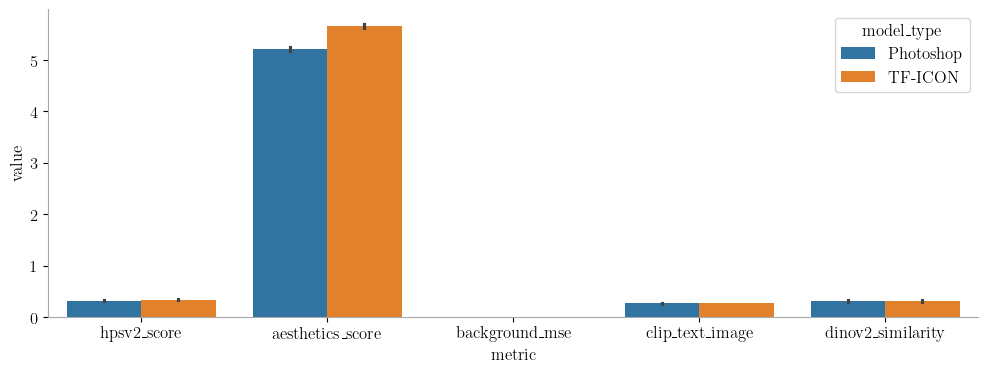

In [6]:
sns.barplot(data=scores_flat, x='metric', y='value', hue='model_type',
            palette=['#1f77b4', '#ff7f0e', '#2ca02c'], dodge=True, linewidth=0.5)

Boxplot for each metric independently

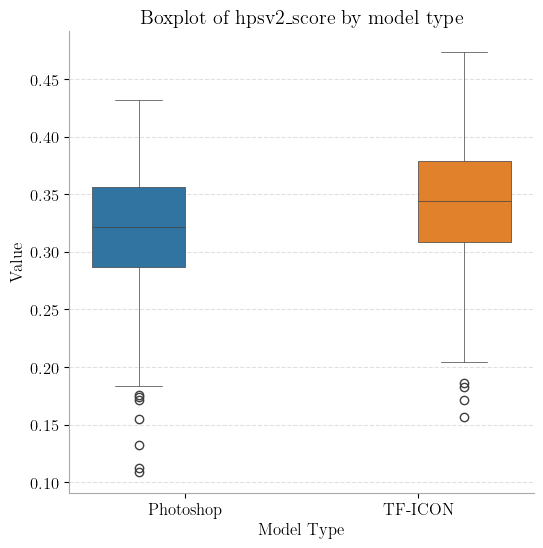

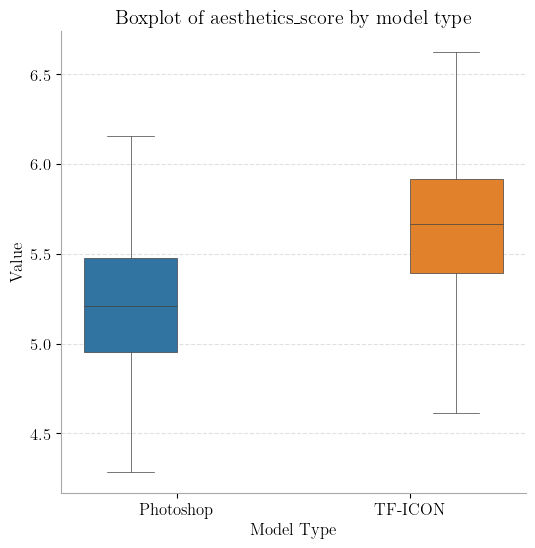

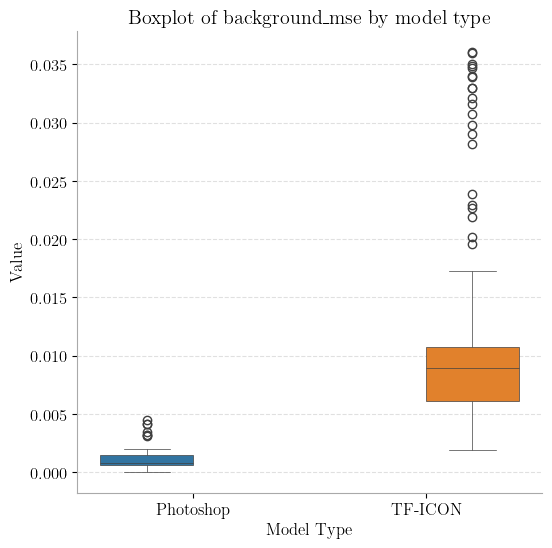

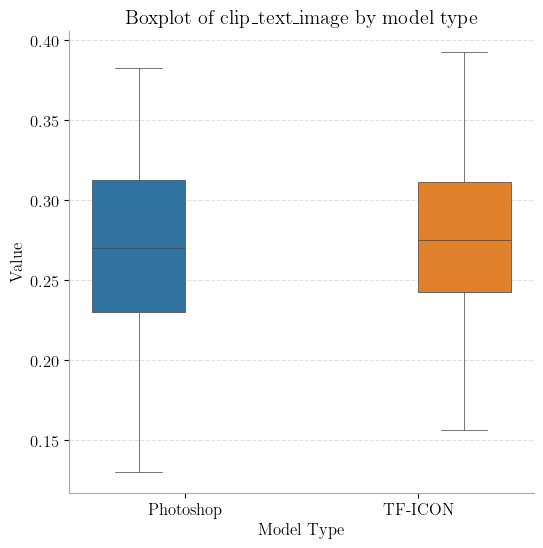

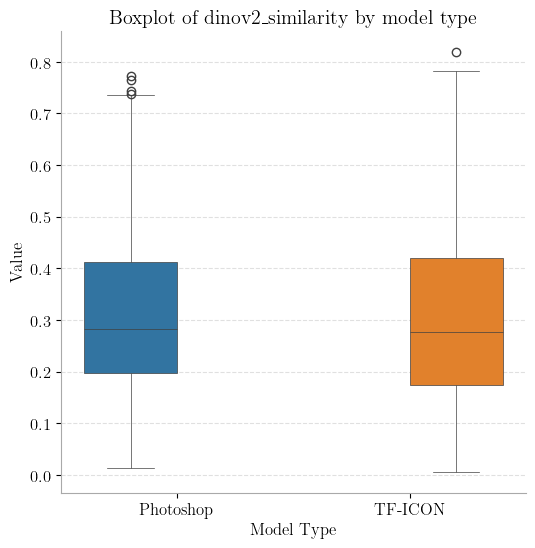

In [7]:
for metric in scores_flat['metric'].unique():
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=scores_flat[scores_flat['metric'] == metric], x='model_type', 
                    y='value', hue='model_type',
                    dodge=True, linewidth=0.5)
    plt.title(f'Boxplot of {metric} by model type')
    plt.ylabel('Value')
    plt.xlabel('Model Type')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.savefig(f'boxplot_{metric}.pdf')
    plt.show()

Same as above but in one plot

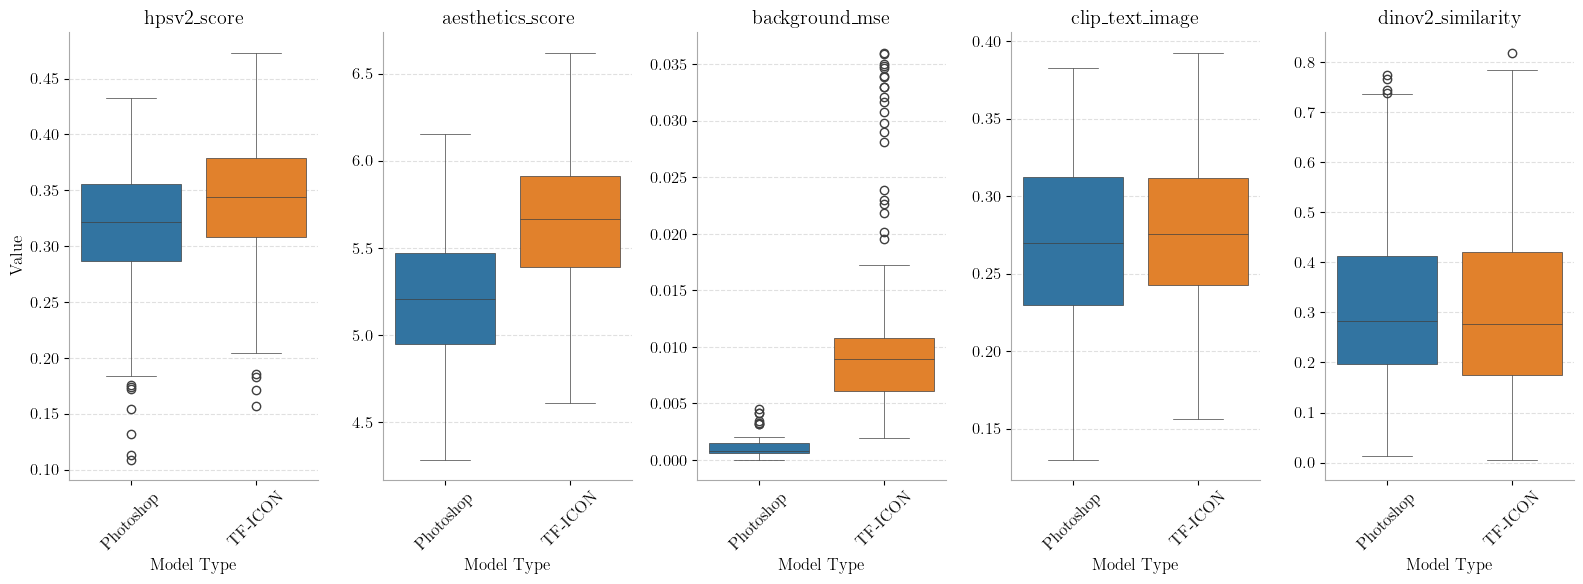

In [8]:
metrics = scores_flat['metric'].unique()
num_metrics = len(metrics)

fig, axes = plt.subplots(1, num_metrics, figsize=(16, 6), sharey=False)

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.boxplot(data=scores_flat[scores_flat['metric'] == metric], 
                x='model_type', y='value', 
                hue="model_type",
                ax=ax, linewidth=0.5)
    ax.set_title(f'{metric}')
    ax.set_ylabel('Value' if i == 0 else '')
    ax.set_xlabel('Model Type')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate the x-axis labels if needed
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
# plt.savefig('all_metrics_boxplot.pdf', bbox_inches='tight')
plt.show()

## Disaggregated analysis across categories

Grouped table

In [9]:
mean_std_table = create_mean_std_table(scores_flat, group_by=['metric', "model_type"])
mean_std_table

,metric,model_type,mean,std
0,aesthetics_score,Photoshop,5.207440,0.373897
1,aesthetics_score,TF-ICON,5.660485,0.404525
2,background_mse,Photoshop,0.001043,0.000669
3,background_mse,TF-ICON,0.009723,0.006253
4,clip_text_image,Photoshop,0.269635,0.051602
5,clip_text_image,TF-ICON,0.275673,0.043796
6,dinov2_similarity,Photoshop,0.318627,0.167962
7,dinov2_similarity,TF-ICON,0.308328,0.170749
8,hpsv2_score,Photoshop,0.319256,0.059025
9,hpsv2_score,TF-ICON,0.342288,0.054793


Barchart disaggregated

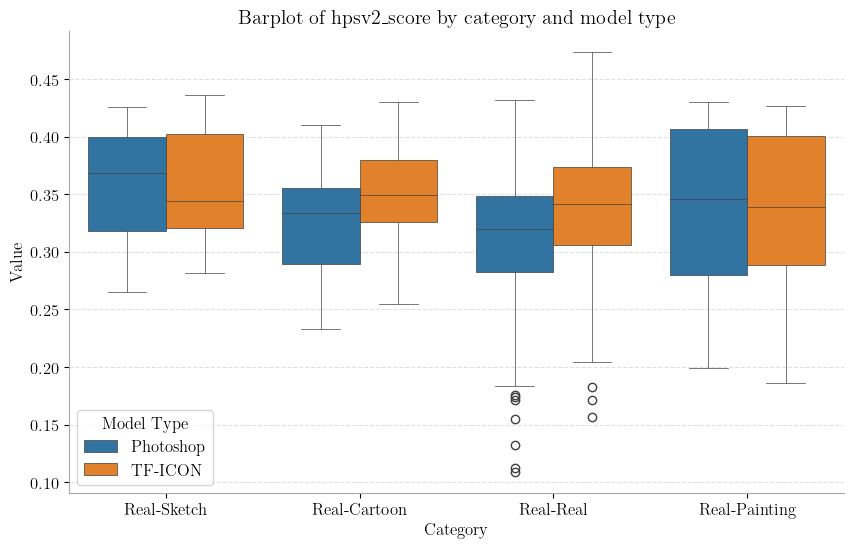

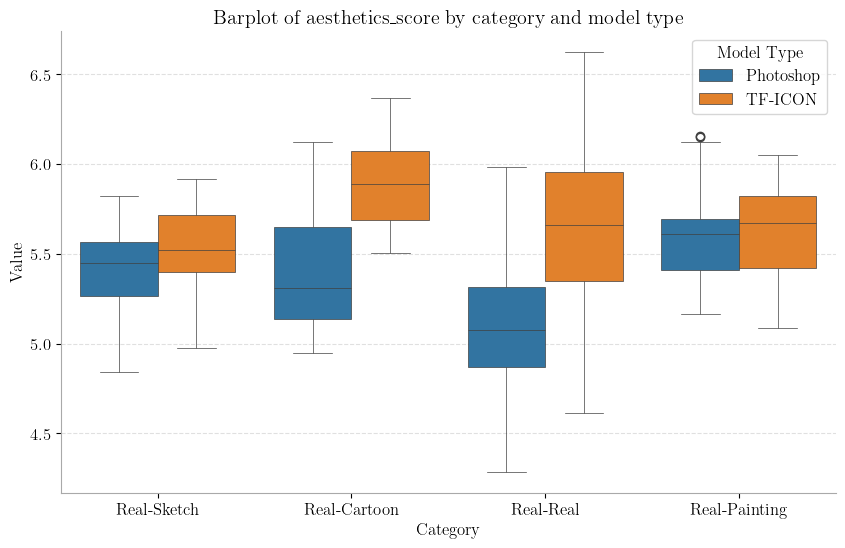

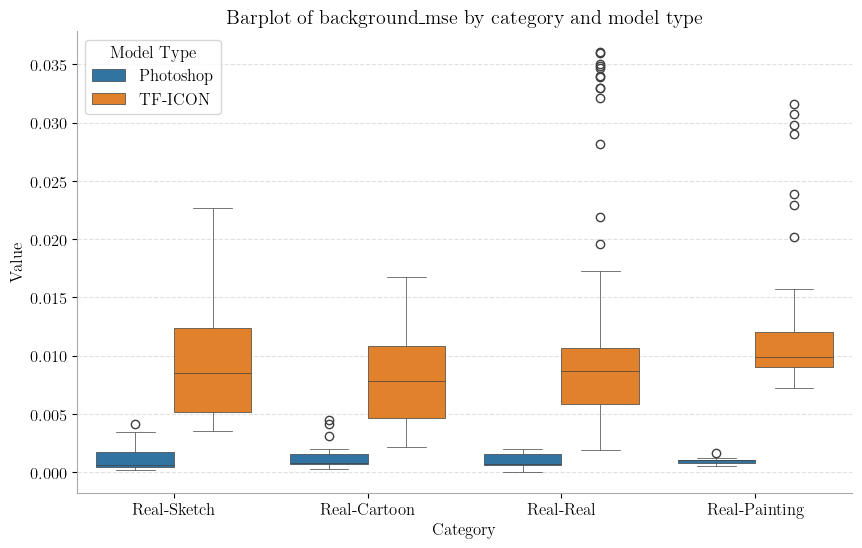

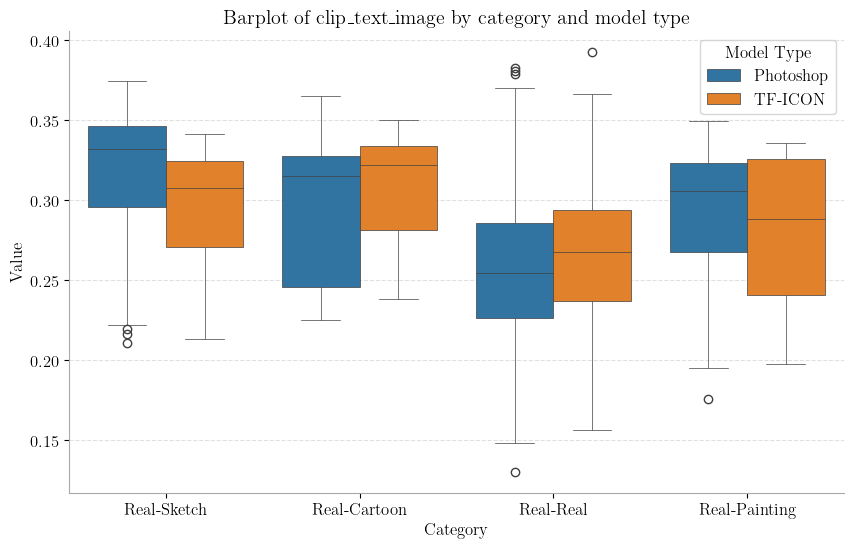

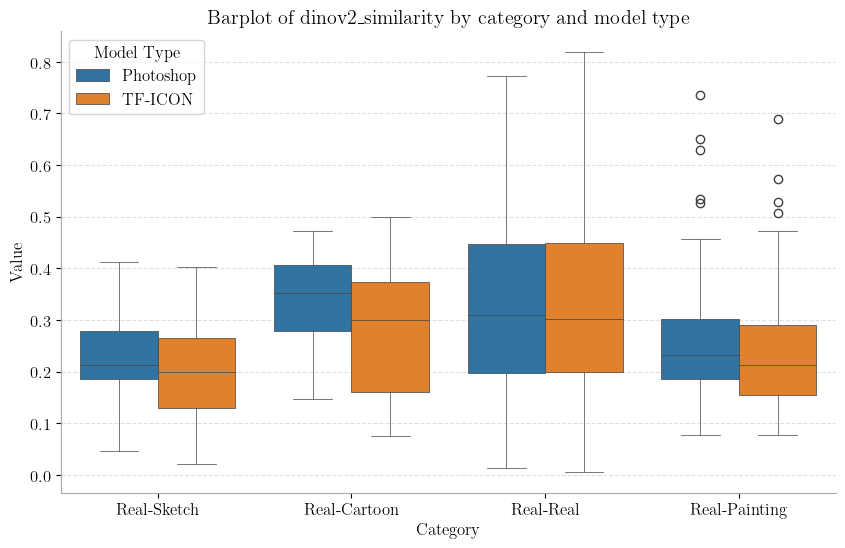

In [10]:
# make a barchart with hue=model_type, y = metric and x = category for each metric seperately

def plot_metric_chart(scores_flat, metric, type='boxplot'):
    plt.figure(figsize=(10, 6))
    if type == 'boxplot':
        sns.boxplot(data=scores_flat[scores_flat['metric'] == metric], 
                    x='category', y='value', hue='model_type',
                    dodge=True, linewidth=0.5)
    elif type == 'barplot':
        sns.barplot(data=scores_flat[scores_flat['metric'] == metric], 
                    x='category', y='value', hue='model_type',
                    dodge=True, linewidth=0.5)

    plt.title(f'Barplot of {metric} by category and model type')
    plt.ylabel('Value')
    plt.xlabel('Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Model Type')
    # plt.savefig(f'barchart_{metric}.pdf')
    plt.show()


# Plot each metric separately
for metric in scores_flat['metric'].unique():
    plot_metric_chart(scores_flat, metric)

same but as barchart

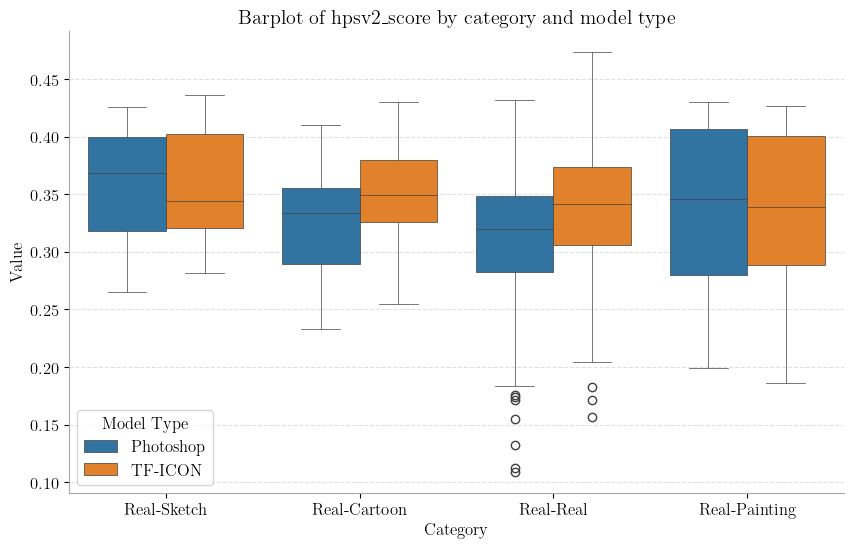

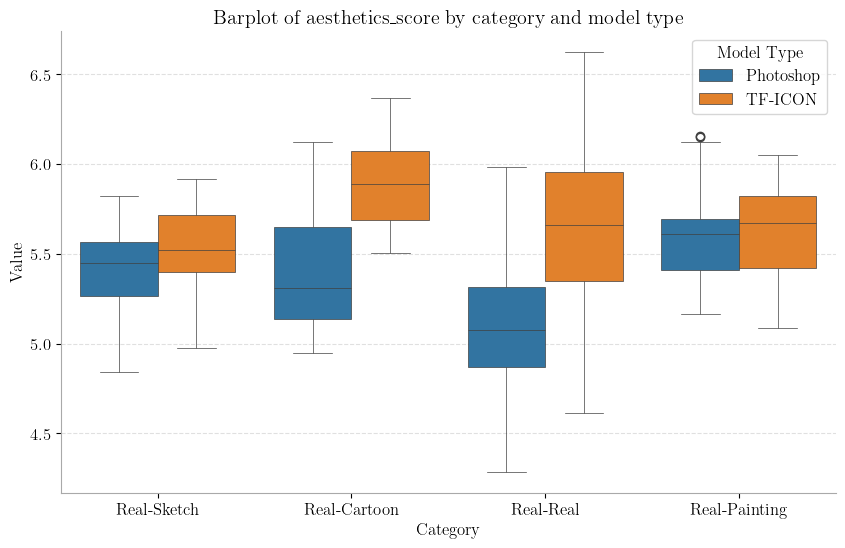

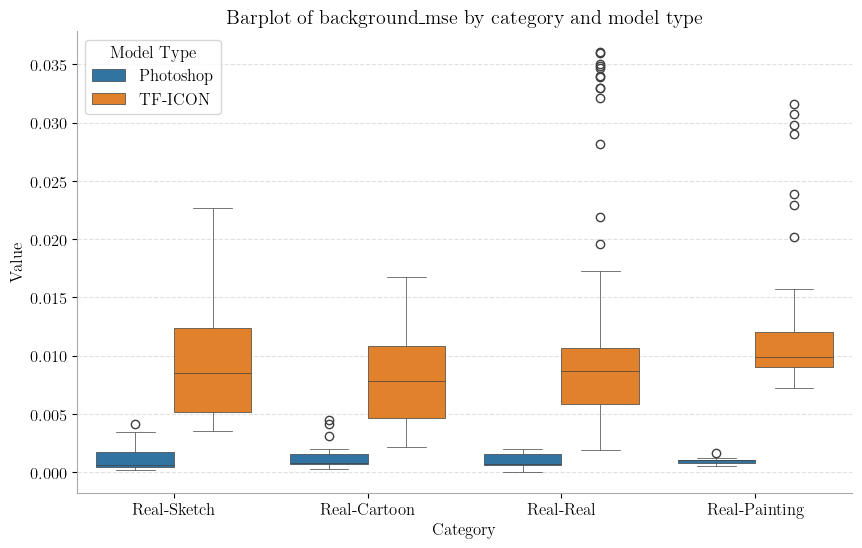

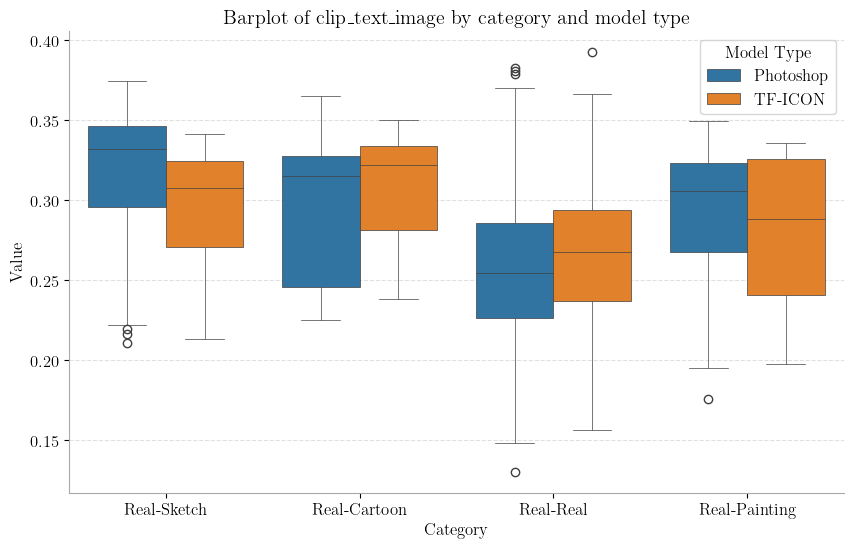

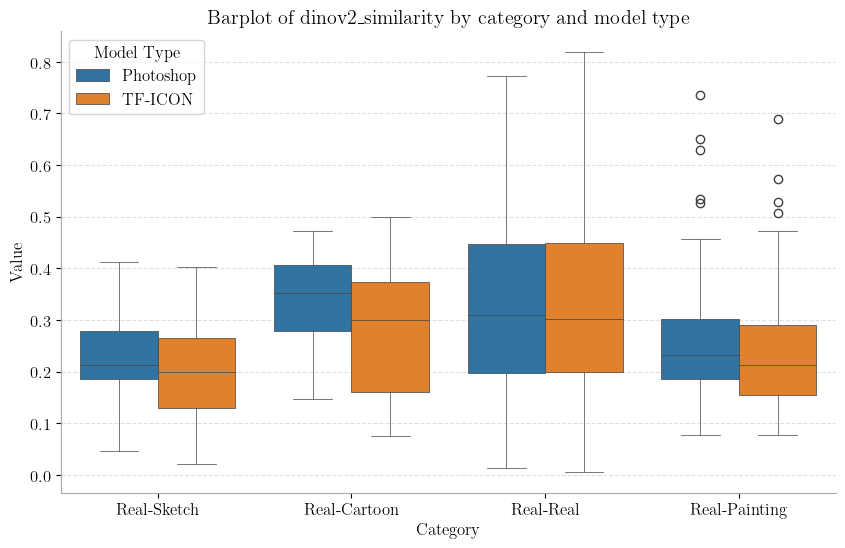

In [11]:
# Plot each metric separately
for metric in scores_flat['metric'].unique():
    plot_metric_chart(scores_flat, metric)